# <span style="color:lightblue"> DATA SCIENCE AND MACHINE LEARNING INTERNSHIP PROGRAM </span>

<h2><center><u>Assignment_4</u></center><h2>

In [1]:
# Importing useful libraries

#dataFrame manipulation and visualiztion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('Display.max_columns', None)
pd.set_option('Display.max_rows', None)

#Needed libraries
import datetime
import math

#Algorithms and scikit learn libraries
from sklearn.preprocessing import normalize, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## <span style="color:lightblue"> **Problem Statement 1:** </span>
The data (sample) were collected in São Paulo - Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption based on the features that contain climate conditions.

**Dataset Description**
- Data: date of the record
- Temperatura Media (C): Average temperature of the day in celsius
- Temperatura Minima (C): Minimum temperature of the day in celsius
- Temperatura Maxima (C): Maximum temperature of the day in celsius
- Precipitacao (mm): Percipitation in mm
- Final de Semana: If the day is the weekend or not
- Consumo de cerveja (litros): Beer consumption in liters

I would be writing python code to perform the following tasks mentioned:
1. Load the dataset, check its shape
2. Rectify the data of the first four columns
   **Hint:** Check columns 'Temperatura Media(C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)' and 'Precipitacao'<br>
   Fix the following errors present in these features
3. Create new features using the 'Data' feature and the make 'Data' column as index<br>
    **Hint:** Create a new feature 'Month' from the dates, consisting of the month of the year.<br>
    Create a new feature 'Day' from the dates, consisting of the day of the week.
    Set values from the 'Data' column as indexes. Use code snippet:
    `df1.set_index('Data', inplace=True)`
4. Handle null and duplicate values
5. Check the data type of the features and convert them to the appropriate data type
6. Analyse features with outlier values
7. Plot and analyze the correlation
8. Split the datast for training and testing
9. Train a linear regression model and print the intercept and coefficients
10. Evaluate the model using the R2 score, mean absolute error and root mean squared error


#### Beer_df refers to the dataframe for the Consumo_cervea data

In [2]:
#task1 Load the dataset and check it's shape
beer_df = pd.read_csv("./../Assignment_files/Consumo_cerveja_ass4.csv", parse_dates=['Data'] )
beer_df.shape

(941, 7)

In [3]:
beer_df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                  object
Temperatura Minima (C)                 object
Temperatura Maxima (C)                 object
Precipitacao (mm)                      object
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object

In [4]:
#task2: Rectifying the data of the first four columns
for column in beer_df.columns:
    if beer_df[column].dtype == 'object':
        beer_df[column] = beer_df[column].str.replace(',', '.')
        beer_df[column] = beer_df[column].astype(dtype='float64')
beer_df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                 float64
Temperatura Minima (C)                float64
Temperatura Maxima (C)                float64
Precipitacao (mm)                     float64
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object

In [5]:
#Task3: creating new features using the 'Date' feature and make the 'Date' columns as index
# Creating a new feature 'Month' From the dates, consisting of the month of the year
beer_df["Month"] = pd.DatetimeIndex(beer_df['Data']).month
# Creating a new feature 'Day' from the dates, consisting of the day of the week.
beer_df["Day"] = pd.DatetimeIndex(beer_df["Data"]).day_of_week

# setting the values from the 'Data' columns as indexes
beer_df.set_index("Data", inplace=True)
beer_df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1.0,0.0


In [6]:
#Handling  null and duplicate values
beer_df.duplicated().sum()

575

Dropping the duplicated entries(deleting them)

In [7]:
beer_df.drop_duplicates(inplace=True)

beer_df.duplicated().sum(), beer_df.isna().sum()

(0,
 Temperatura Media (C)          1
 Temperatura Minima (C)         1
 Temperatura Maxima (C)         1
 Precipitacao (mm)              1
 Final de Semana                1
 Consumo de cerveja (litros)    1
 Month                          1
 Day                            1
 dtype: int64)

Since there is only one missing row of data I will drop the missing values

In [8]:
beer_df.dropna(axis=0, inplace=True)
beer_df.isna().sum(), f'the number of duplicated entries: {beer_df.duplicated().sum()}'

(Temperatura Media (C)          0
 Temperatura Minima (C)         0
 Temperatura Maxima (C)         0
 Precipitacao (mm)              0
 Final de Semana                0
 Consumo de cerveja (litros)    0
 Month                          0
 Day                            0
 dtype: int64,
 'the number of duplicated entries: 0')

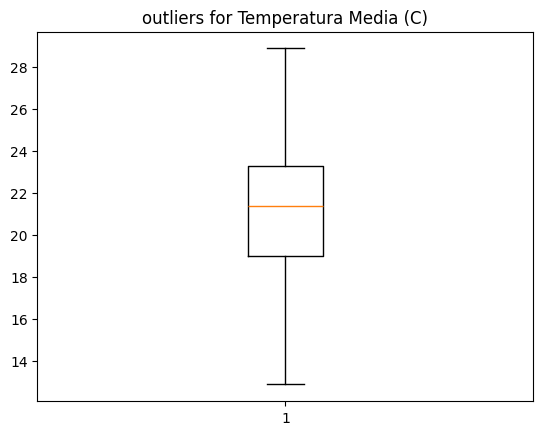

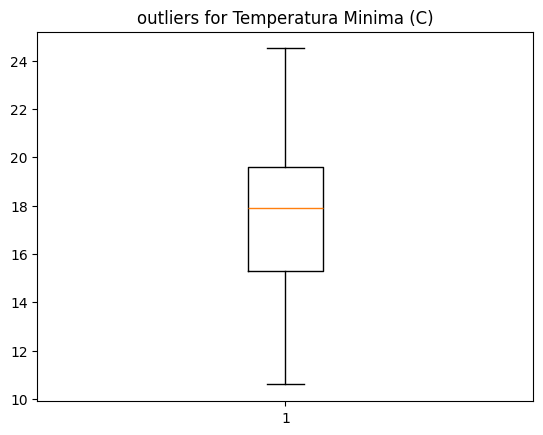

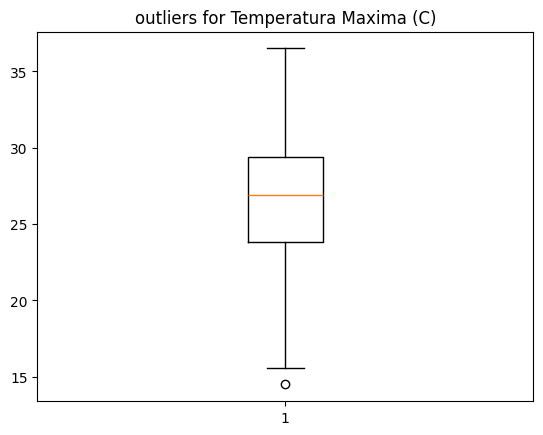

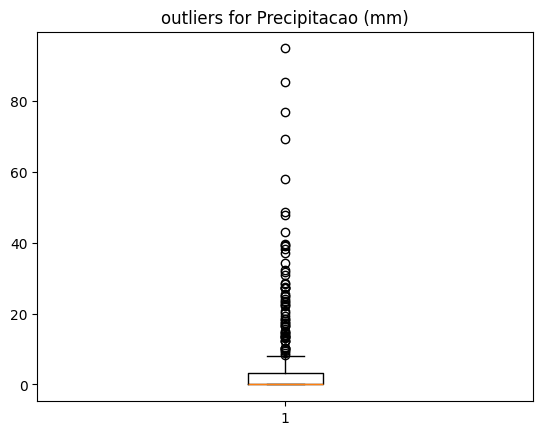

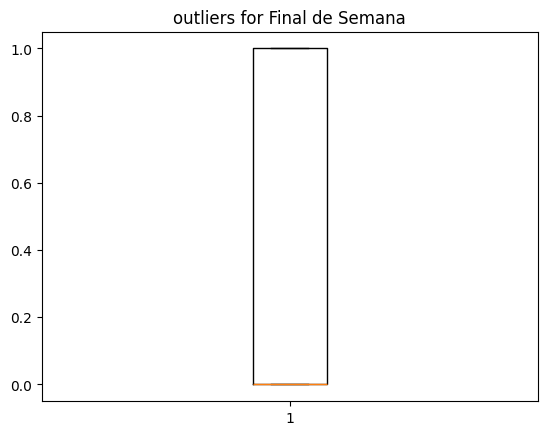

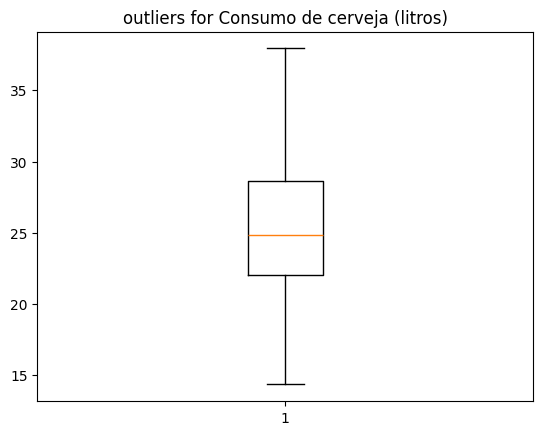

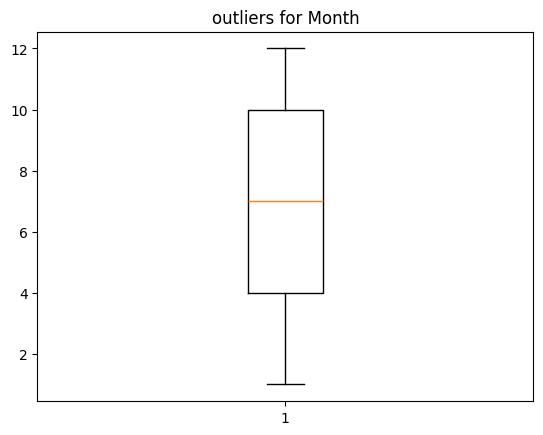

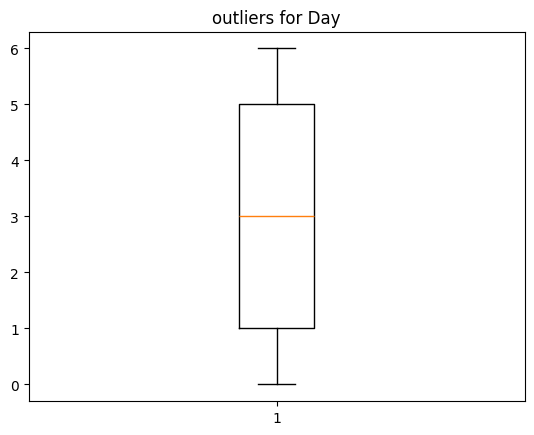

In [9]:
#detecting outliers
for column in beer_df.columns:
    fig, ax = plt.subplots()
    ax.boxplot(beer_df[column])
    ax.set_title(f"outliers for {column}")


The 'Precipitacao (mm)' Column has a lot of outliers

In [10]:
#standardizing the Precipitacao column
scaler = StandardScaler()
testing_df = beer_df.copy()

In [11]:
beer_df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615,-0.103169,-0.018669
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509,-0.172923,-0.016574
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672,-0.074866,-0.020871
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784,0.007089,-0.063284
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981,-0.006526,0.790137
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000,0.039908,0.413826
Month,-0.103169,-0.172923,-0.074866,0.007089,-0.006526,0.039908,1.000000,-0.009549
Day,-0.018669,-0.016574,-0.020871,-0.063284,0.790137,0.413826,-0.009549,1.000000


<Axes: >

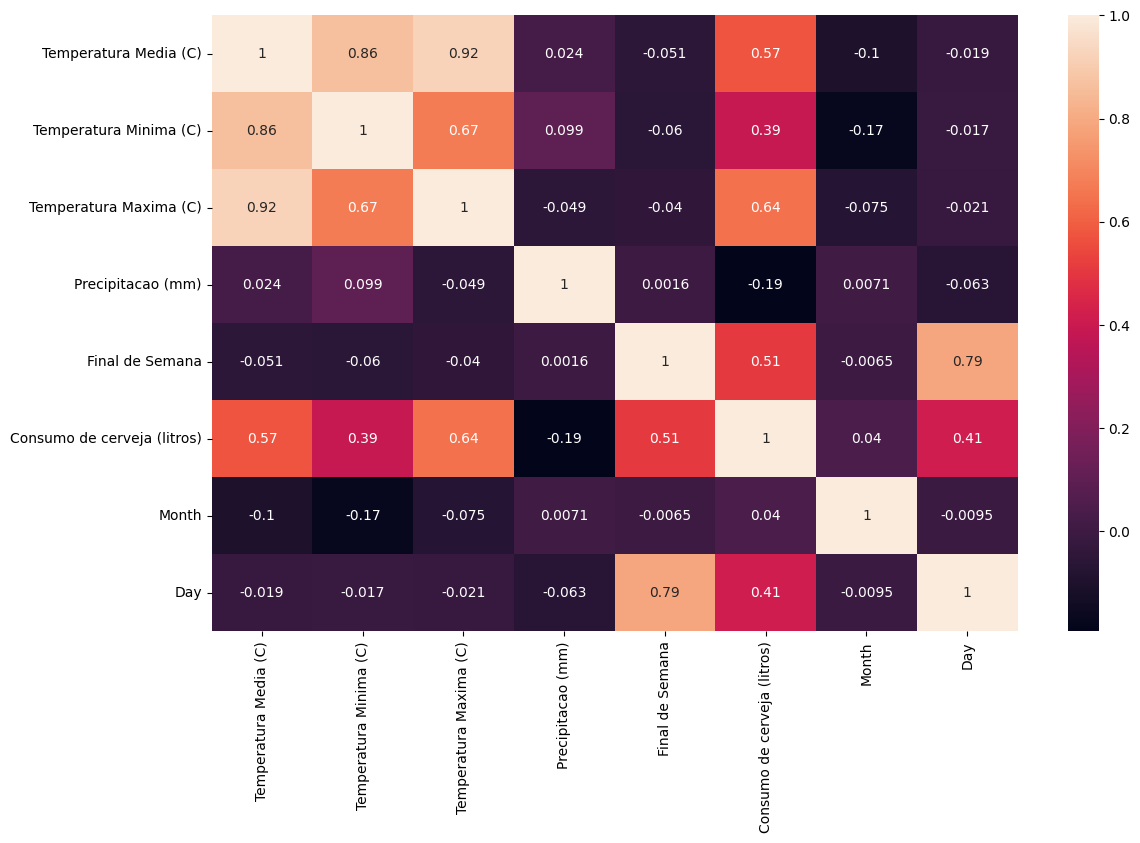

In [12]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(beer_df.corr(), annot=True, ax=ax)

In [13]:
X = testing_df.drop("Consumo de cerveja (litros)", axis=1)
y = testing_df["Consumo de cerveja (litros)"]

np.random.seed(16)
#Scaling the columns....
for column in X.columns:
    scale = scaler.fit(testing_df[[column]])
    testing_df[column] = scale.transform(testing_df[[column]])

#spliting the data into trainin and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#initializing the model to be used
lin_reg = LinearRegression().fit(X_train, y_train)

y_preds = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_preds)
mse = mean_absolute_error(y_test, y_preds)
rmse = math.sqrt(mean_squared_error(y_test, y_preds))

r2, mse, rmse

(0.7054594662928995, 1.9876299108365654, 2.244341113741742)

In [14]:
lin_reg.coef_, lin_reg.intercept_

(array([-9.36429878e-02,  9.63344333e-02,  6.97699788e-01, -5.59951224e-02,
         5.11163182e+00,  1.21288770e-01,  1.96874464e-03]),
 5.241748684126051)

## <span style="color:lightblue"> **Problem Statement 2:** </span>
I am provided with the california housing dataset. Based on the given parameters of a house, predict its price.

**Dataset Description:**

The dataset contains nine features:
- Longitude: A measure of how far west a house is; a higher value is farther west
- Latitude: A measure of how far north a house is; a higher value is farther north
- hosingMedianAge: Meduan age of a house within a block; a lower number is a newser building
- total rooms: Total number of rooms withina block
- total bedrooms: Total number of bedrooms within a block
- populations: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- median house value: Median house value for households within a block (measured in US Dollars)

I'm writing a python code to perform the following tasks mentioned:
1. Load the datam check its shape and check for null values
2. Split the datset for training and testing - 1000- instances for testing
3. Train the model using sklearn (Apply linear regression to train a model for prediction)
4. Predict the prices on test data and evaluate the model by r2 score and mean absolute error
5. Find coefficient and intercept using the trained model

In [15]:
housing_df = pd.read_csv("./../Assignment_files/california_housing_train_ass4.csv")
housing_df.shape

(17000, 9)

In [16]:
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

No null values in the 17000 rows and 9 columns

In [17]:
housing_df.duplicated().sum()

0

In [18]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [19]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


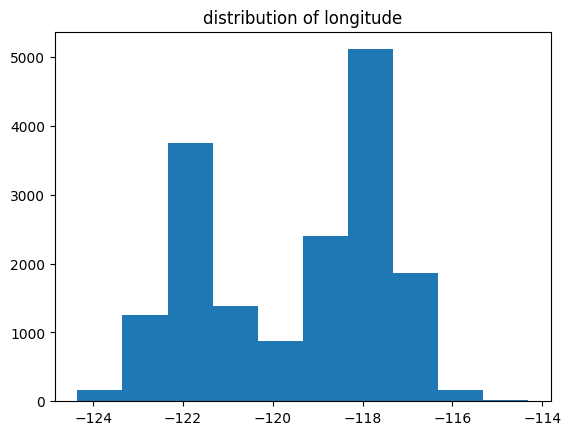

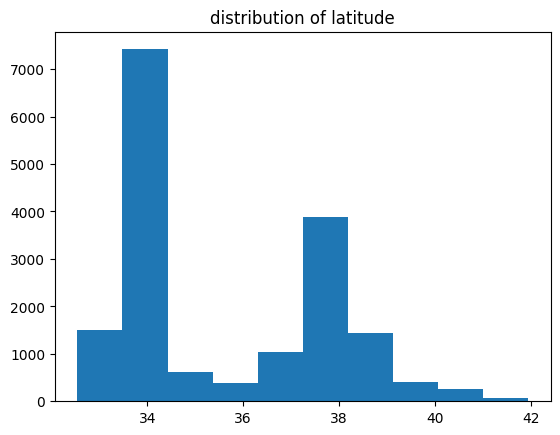

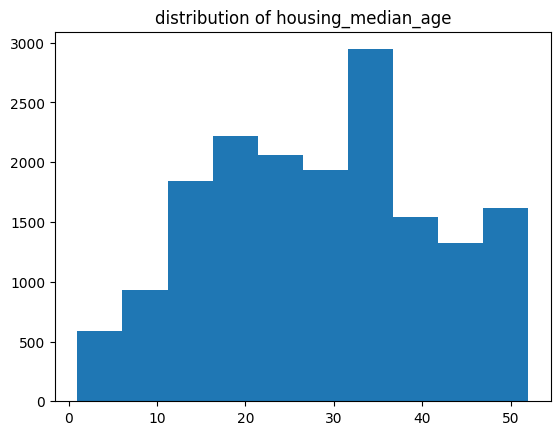

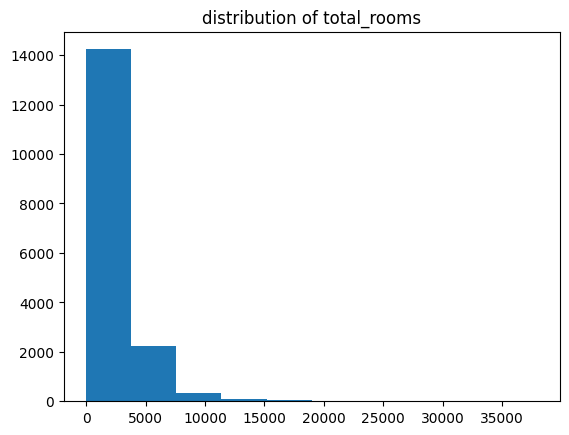

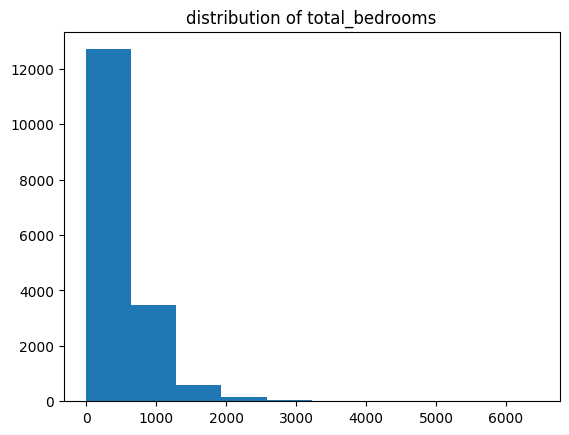

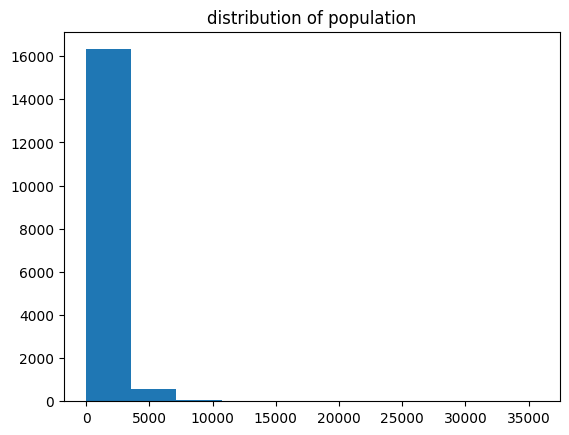

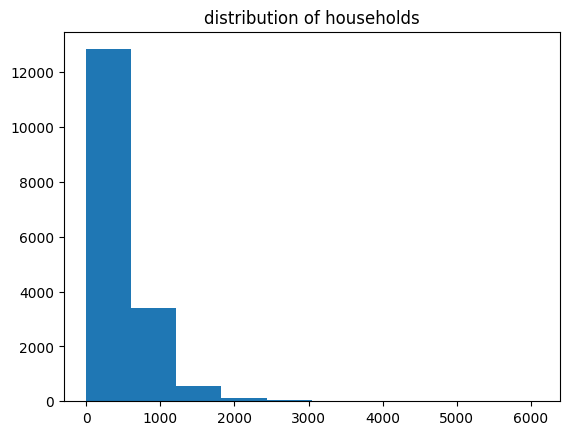

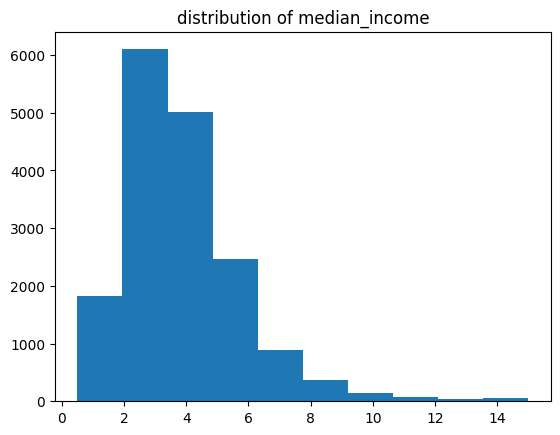

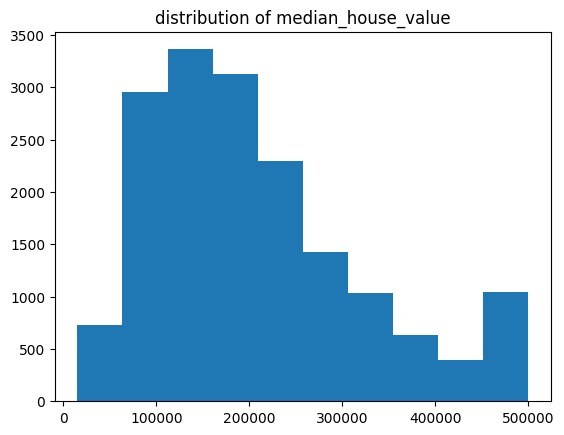

In [20]:
for column in housing_df.columns:
    fig, ax = plt.subplots()
    ax.hist(housing_df[column])
    ax.set_title(f'distribution of {column}')
 

Since the distributions of the data are mostly not normaly distributed I would use robustScaler to scale them so the model can work better
Before scaling I would shuffle the data, separate the target label from the features and split it intp test and train sets

In [21]:
shuffled_df = housing_df.sample(frac=1, random_state=42)
shuffled_df.shape

shuffled_X = shuffled_df.drop('median_house_value', axis=1)
shuffled_y = shuffled_df[["median_house_value"]]

print(f'''
shape of shuffled_X:{shuffled_X.shape}
shape of shuffeld_Y:{shuffled_y.shape}
''')
shuffled_X.head()


shape of shuffled_X:(17000, 8)
shape of shuffeld_Y:(17000, 1)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10941,-120.87,37.77,9.0,4838.0,920.0,2460.0,923.0,3.5959
5250,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124
10292,-120.05,36.98,16.0,3705.0,739.0,2463.0,697.0,2.5288
2266,-117.42,34.02,9.0,5455.0,882.0,3015.0,858.0,4.2321
6398,-118.26,33.97,52.0,1331.0,346.0,1144.0,362.0,1.5326


In [22]:
#Initialize the scaler
scaler = RobustScaler()

#Fit and transform the data in the shuffled_X columns
for column in shuffled_X.columns:
    shuffled_X[[column]] = scaler.fit_transform(shuffled_X[[column]])
    

shuffled_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10941,-0.627968,0.928760,-1.052632,1.604854,1.383630,1.388829,1.590101,0.023312
5250,0.092348,-0.036939,1.210526,0.364067,-0.034164,-0.015038,0.015468,2.075683
10292,-0.411609,0.720317,-0.684211,0.934142,0.868327,1.392052,0.890951,-0.461596
2266,0.282322,-0.060686,-1.052632,1.970105,1.275445,1.984962,1.389018,0.312411
6398,0.060686,-0.073879,1.210526,-0.471215,-0.250534,-0.024705,-0.145398,-0.914286


In [23]:
X_test = shuffled_X[:1000]
X_train = shuffled_X[1000:]
y_test = shuffled_y[:1000]
y_train = shuffled_y[1000:]

print(f'''
shape of X_test: {X_test.shape}
shape of y_test: {y_test.shape}
shape of X_train: {X_train.shape}
shape of y_train: {y_train.shape}
''')


shape of X_test: (1000, 8)
shape of y_test: (1000, 1)
shape of X_train: (16000, 8)
shape of y_train: (16000, 1)



In [24]:
#Initialize model, fit model and check score on training datas
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6410106682980452

In [25]:
#Predict the prices on test data and evaluate the model by r2 score and mean absolute
y_preds = model.predict(X_test)

r2score = r2_score(y_preds, y_test)
mae = mean_absolute_error(y_preds, y_test)
rmse = math.sqrt(mean_squared_error(y_preds, y_test))
r2score, mae, rmse

(0.4104653591986347, 52486.71121771109, 72867.53677522801)

The model is performing still poorly, I really thought robust scaling would make a huge difference in the performance of the model

## <span style="color:lightblue"> **Problem Statement 3:** </span>
I have been provided with the  medical cost dataset. I need to predict individual medical costs billed by health insurance.

Dataset Description:
- age: age of the primary beneficiary
- sex: gender of primary beneficiary female, male
- bmi: Body mass index, providing an understanding of the body, weights that are relatively<br>
  high or low relative to height, an objective index of body.
- weight(kg/m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- Children: Number of children covered by health insurance / Number of dependents
- smoker: Smokes or not
- region: the beneficiary's residential area in the US, northest, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

I would write a python code to perform the following tasks mentioned:
1. Load the data check its shape and check for null values
2. Convert categorical features to numerical values (Use One-Hot Encoding)
3. Split the dataset for training and testing
4. Train the model using sklearn - Linear Regression
5. Find the intercept and coefficient from the trained model
6. Predict the prices of test data and evalutate the model using calculated r2 score and root mean squared error

In [ ]:
insurance_df = pd.read_csv("./../Assignment_files/insurance_ass4.csv")
insurance_df.head()

In [ ]:
insurance_df.shape, insurance_df.isna().sum()

Data have no null values

In [ ]:
insurance_df.duplicated().sum()

Data has just one duplicate value, which I am going to drop

In [ ]:
insurance_df.drop_duplicates(inplace=True)

In [ ]:
insurance_df.sex.dtypes == 'object'

In [ ]:
#Using One-Hot Encoding to conevert categorical features into numerical values
categoricals = list(filter(lambda x : insurance_df[x].dtypes == 'object', insurance_df.columns))

#Using One-Hot Encoding to conevert categorical features into numerical values
encoder = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer([("one hot", 
                                  encoder, 
                                  categoricals], remainder="Passthrough")


Encoding categorical values using oneHotEncoder

## <span style="color:lightblue"> **Problem Statement 4:** </span>
I have been provided with the '50_Startups' data. Using the given features, I must predict the profit of these startups.

**Dataset Description:**
- R&D Spend: Expenditures in Research and Development
- Administration: Expenditures in Administration
- Marketing Spend: Expenditures in Marketing
- State: In which state the company belongs to
- Profit: The profit made by the company

I would write python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values using Label Encoder
3. Split the dataset for training and testing
4. Train the model using sklearn (linear regression), also find the intercept and coefficient from the trained model
5. Predict the profits of test data and evaluate the model using r2 score and mean squared error
6. Regularize the model using Ridge Regression and find the score
7. Regularize the model using Lasso Regeression and find the score

In [26]:
#Task1: Loading the data, checking its shape and checking for null values
startups_df = pd.read_csv("./../Assignment_files/50_Startups_ass4.csv")
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [27]:
startups_df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [28]:
startups_df.duplicated().sum(), startups_df.shape

(0, (50, 5))

In [29]:
startups_df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [32]:
#Task 2: Converting the categorical features to numerical values using LabelEncoder
cat_column = "State"

encoder = LabelEncoder()

encoded_data = encoder.fit_transform(startups_df[cat_column])
encoded_df = pd.DataFrame(encoded_data, columns=[cat_column])
startups_df["State"] = encoded_df
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


after OneHotEncoding the state column, I would normalize the other coloumns to have values between 0 and 1 so the model can do better

In [35]:
columns = ["R&D Spend", "Administration", "Marketing Spend",]

norm_data = normalize(startups_df[columns])
scaled_df = pd.DataFrame(norm_data, columns=columns)
# scaled_df.head()
scaled_startup = startups_df.drop(columns, axis=1)
scaled_startup = pd.concat([scaled_startup, scaled_df], axis=1)
scaled_startup.head()

,State,Profit,R&D Spend,Administration,Marketing Spend
0,2,192261.83,0.319006,0.264115,0.910208
1,0,191792.06,0.327563,0.304959,0.894261
2,1,191050.39,0.342947,0.226064,0.911747
3,2,182901.99,0.338630,0.278348,0.898806
4,1,166187.94,0.352388,0.226627,0.907999


In [36]:
#Task3: spliting the dataset for training and testing
X = scaled_startup.drop("Profit", axis=1)
y = scaled_startup["Profit"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Task4:  training the model using sklearn(linear regression)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7908883772527702

In [38]:
#Finding the intercept and coefficient from the trained model
model.intercept_, model.coef_

(200104.64268942983,
 array([   3033.24288734,  186698.67840545, -167987.79341353,
         -72343.23086593]))

In [39]:
# Task5: predicting the profits of test data and evaluate the model using r2 score and mean squared error
y_preds = model.predict(X_test)

r2score = r2_score(y_preds, y_test)
mae = mean_absolute_error(y_preds, y_test)
rmse = math.sqrt(mean_squared_error(y_preds, y_test))
r2score, mae, rmse

(0.9018340530923414, 10212.15935027009, 11187.71494815931)

In [42]:
#Task6: Regularizing the model using Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.7763471074835956, 0.870632025852935)

In [43]:
#Task7: Regularizing the model using Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.7908883741572102, 0.8710659933192696)